In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn

In [2]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [3]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Train set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features uesd: {}".format(np.sum(lasso.coef_ != 0)))

Train set score: 0.29
Test set score: 0.21
Number of features uesd: 4


In [4]:
# we found the score of lasso model is low which is a sign of underfitting
# we choose to reset the value of alpha
# meanwhile, we should increase the value of max_iter
# maxtier: the maximum number of times an iteration is run
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Train set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Train set score: 0.90
Test set score: 0.77
Number of features used: 33


In [5]:
# if the value of alpha is too tiny, regularization fails!
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Train set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Train set score: 0.95
Test set score: 0.64
Number of features used: 96


In [6]:
from sklearn.linear_model import Ridge

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

Text(0, 0.5, 'Coeffient magnitude')

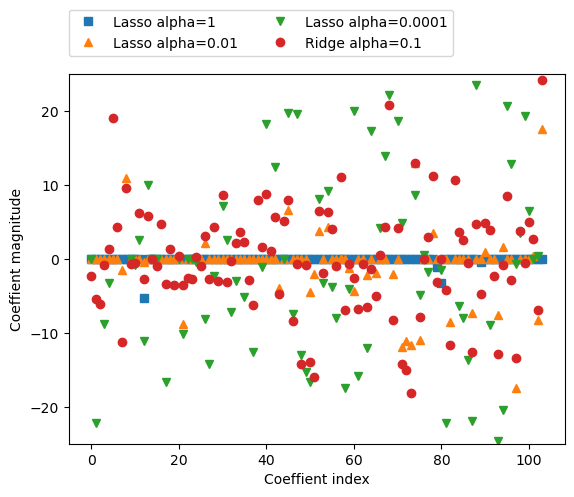

In [8]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))   #ncol: n_column
plt.ylim(-25, 25)
plt.xlabel("Coeffient index")
plt.ylabel("Coeffient magnitude")